# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import f_oneway
%matplotlib inline

# 2. Read the data as a data frame

In [2]:
df = pd.read_csv('insurance.csv')

# 3. Perform basic EDA which should include the following and print out your insights at every step.
## a. Shape of the data

In [3]:
df.shape

(1338, 7)

### Insights:
There are 1338 rows & 7 columns in the data. We have sufficient rows as compared to number of columns and most of the models with not overfit the data as we don't have problem of curse of dimensionality in this case.

## b. Data type of each attribute

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Insights:
Data type of columns age & children is Integer, columns bmi & charges is Float and columns sex, smoker & region is String

So, we have numerical data for age, bmi, children & charges columns & categorical data for sex, smoker & region columns.

Though both age & children are represented using Integer, children would be discrete numerical data but age would be continuous numerical data as normally age is a cotinuopus variable but we generally write it in Integer form.

Columns bmi & charges are having continuous numerical data

## c. Checking the presence of missing values

In [5]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [6]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Insights:
Since, all columns show count of 1338 which is also the number of rows, it can be concluded that there are no missing values.

Using unique method on categorical data to just be sure that there are no values such as '?' or 'null' used to represent missing values.

## d. 5 point summary of numerical attributes

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Insights:
age seems to have somewhat uniform distribution with first quarter of length 9, second & third quarters of length 12 each & right tail of length 13 with little right skew.

bmi seems to be normally distributed with little right skew as the tail on right is long but since mean is not much greater than median, it might be due to some outliers on the right.

children seems to have little right skew with relatively very long right tail but since mean is not much greater than median, it might be probably due to some outliers on the right.

charges seems to have large positive skew as is evident from large difference between mean & median & also with very long tail on right.

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


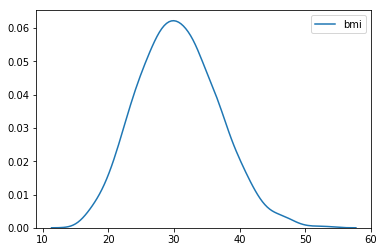

In [10]:
sns.kdeplot(df['bmi'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


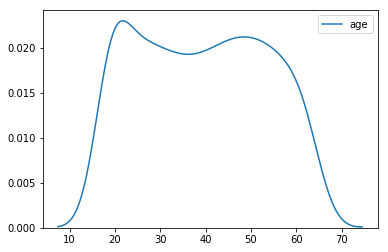

In [11]:
sns.kdeplot(df['age'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


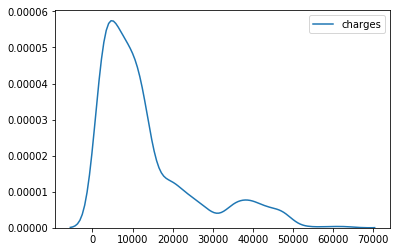

In [12]:
sns.kdeplot(df['charges'])
plt.show()

### Insights:
As per our analysis with 5 point summary, we can see that bmi is normally distributed with some outliers on right denoted by long tail on right.

Age has 2 peaks which might mean data from 2 different category people would have been combined to get the results like taking sample from college going students & office going people.

Charges is highly positively skewed as per our analysis with 5 point summary with very long tail on right which would mean there are some outliers on the right. Also, there is small second peak at around 38,000 other than big peak at around 6,000. This might be due to sampling Error or company levying some minimum charges for high charges.

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [13]:
df['bmi'].skew()

0.2840471105987448

In [14]:
df['age'].skew()

0.05567251565299186

In [15]:
df['charges'].skew()

1.5158796580240388

### Insights:
bmi is slightly positively skewed

age is symmetric with very less right skew

charges is highly positively skewed

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges’ columns

In [16]:
q1 = np.quantile(df['bmi'], 0.25)
q3 = np.quantile(df['bmi'], 0.75)
lower = q1 - 1.5 * (q3 - q1)
upper = q3 + 1.5 * (q3 - q1)
print("Count of Outliers for bmi on left tail =", sum(i < lower for i in df['bmi']))
print("Count of Outliers for bmi on right tail =", sum(i > upper for i in df['bmi']))

Count of Outliers for bmi on left tail = 0
Count of Outliers for bmi on right tail = 9


In [17]:
q1 = np.quantile(df['age'], 0.25)
q3 = np.quantile(df['age'], 0.75)
lower = q1 - 1.5 * (q3 - q1)
upper = q3 + 1.5 * (q3 - q1)
print("Count of Outliers for age on left tail =", sum(i < lower for i in df['age']))
print("Count of Outliers for age on right tail =", sum(i > upper for i in df['age']))

Count of Outliers for age on left tail = 0
Count of Outliers for age on right tail = 0


In [18]:
q1 = np.quantile(df['charges'], 0.25)
q3 = np.quantile(df['charges'], 0.75)
lower = q1 - 1.5 * (q3 - q1)
upper = q3 + 1.5 * (q3 - q1)
print("Count of Outliers for charges on left tail =", sum(i < lower for i in df['charges']))
print("Count of Outliers for charges on right tail =", sum(i > upper for i in df['charges']))

Count of Outliers for charges on left tail = 0
Count of Outliers for charges on right tail = 139


### Insights:
As per our analysis, using Inter-quartile range, we find that there are 9 outliers for bmi on right tail & 139 outliers for charges on right tail.

There are no outliers for age

## h. Distribution of categorical columns (include children)

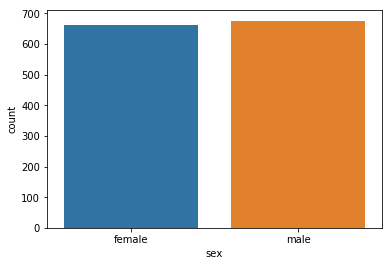

In [19]:
sns.countplot(df['sex'])
plt.show()

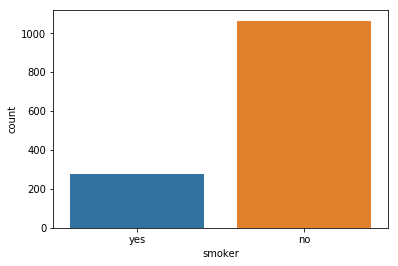

In [20]:
sns.countplot(df['smoker'])
plt.show()

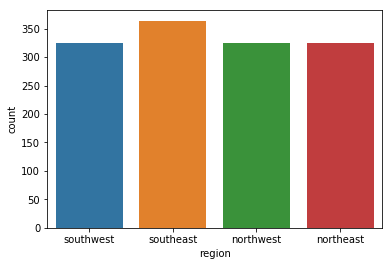

In [21]:
sns.countplot(df['region'])
plt.show()

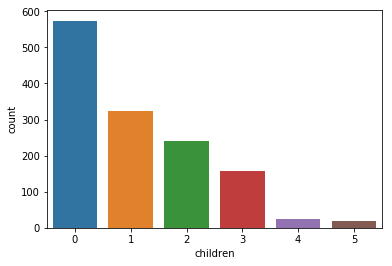

In [22]:
sns.countplot(df['children'])
plt.show()

### Insights:
Beneficiaries are almost uniformly distributed with respect to sex & region with minor increase in people from southeast.

But, there are very few smokers (about 20%) & for children as per our earlier analysis, data is highly positively skewed with almost 45% of the Beneficiaries having no children & 80% of the Benefeciaries having up to 2 children

## i. Pair plot that includes all the columns of the dataframe

In [23]:
#Converting Categorical data to Numerical Data so that we can study all columns using pairplot
df['smoker'].replace(['yes','no'],[1,0],inplace=True)
df['sex'].replace(['male','female'],[1,0],inplace=True)
df = pd.get_dummies(df, columns=['region'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


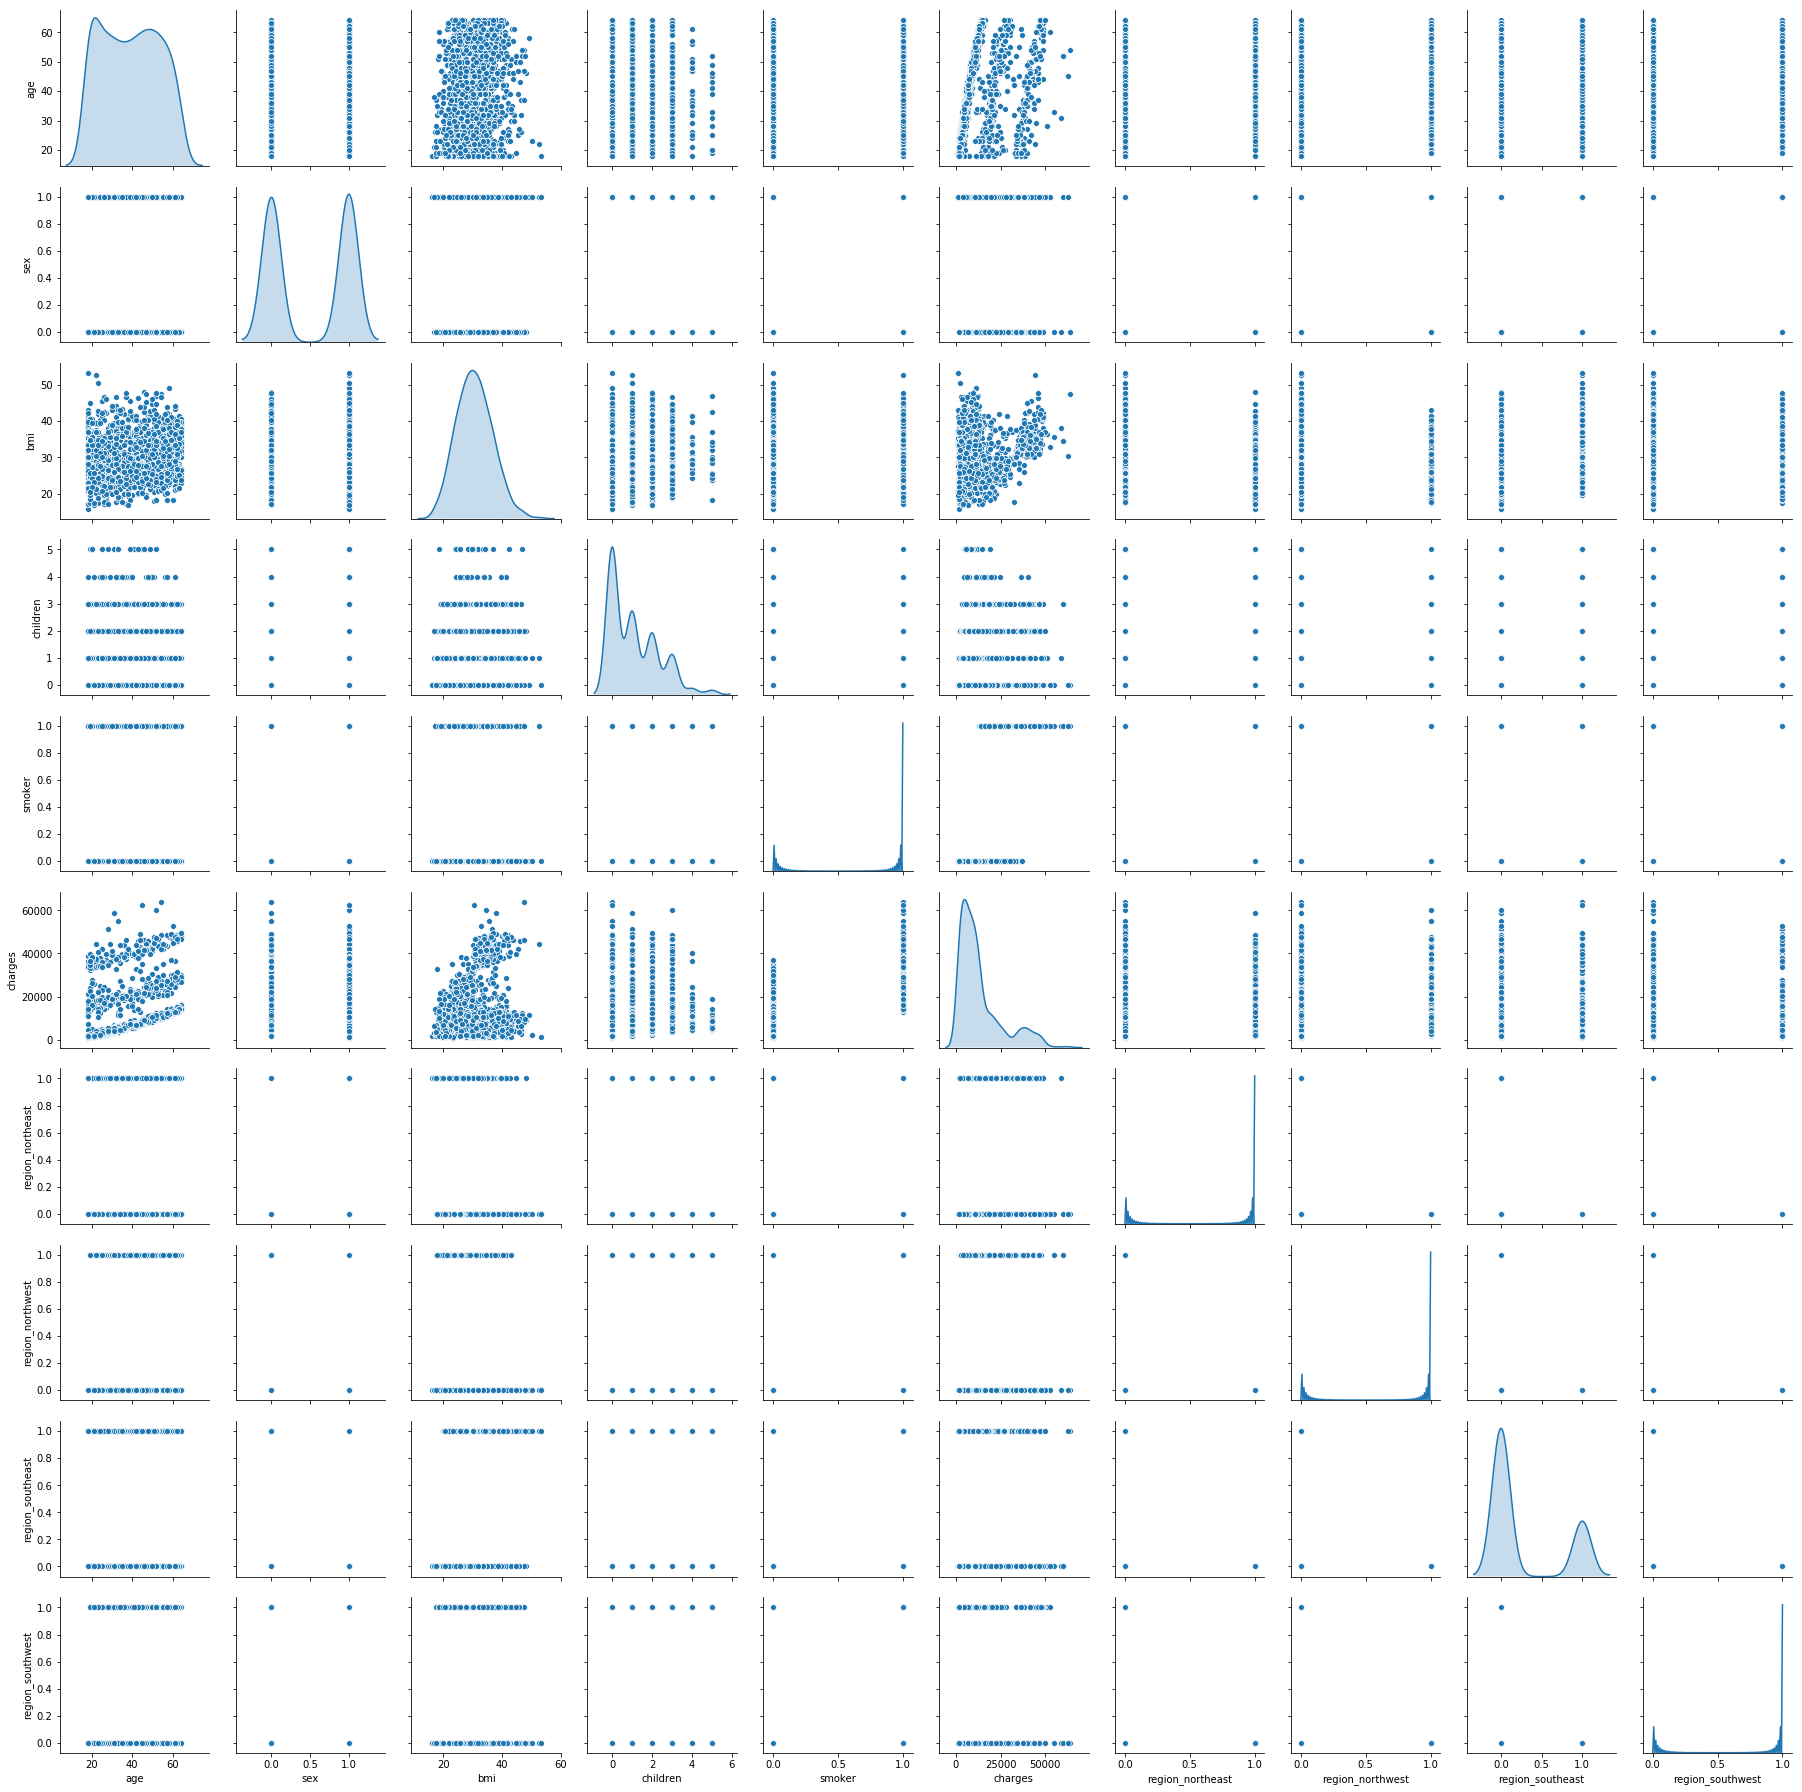

In [24]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Insights:
We have already studied the Distribution of individual columns.

From above pairplot, we see some positive correlation between age & charges, between bmi & charges and between smokers & charges which is natural & it is good that we see the same in our data too.

There is also some correlation between region & bmi. BMI of northwest population is on a lower side & sotheast people is on a higher side.

We don't see much correlation among other column pairs.

# 4. Answer the following questions with statistical evidence
## a. Do charges of people who smoke differ significantly from the people who don't?

In [25]:
#Using loc method on Dataframe to extract only charges column data for smokers & non-smokers
smoker_charges = df.loc[df['smoker'] == 1, 'charges']
nonsmoker_charges = df.loc[df['smoker'] == 0, 'charges']

#Performing Independent T-test to test if two datasets are significantly different or not
tstistic , pval = ttest_ind(smoker_charges , nonsmoker_charges)

#Hypothesis:
#H0 (Null Hypothesis): There is no significant difference between charges of people who smoke from the people who don't
#H1 (Alternate Hypothesis): There is significant difference between charges of people who smoke from the people who don't

print("Insights:")
if pval<0.05:
    print("Since value of p is", pval, "which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.\nHence, we can conclude that there is significant difference between charges of people who smoke from the people who don't.")
else:
    print("Since value of p is", pval, "which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.\nHence, we can conclude that there is no significant difference between charges of people who smoke from the people who don't.")

Insights:
Since value of p is 8.271435842177219e-283 which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.
Hence, we can conclude that there is significant difference between charges of people who smoke from the people who don't.


## b. Does bmi of males differ significantly from that of females?

In [26]:
#Using loc method on Dataframe to extract only bmi column data for males & females
male_bmi = df.loc[df['sex'] == 1, 'bmi']
female_bmi = df.loc[df['sex'] == 0, 'bmi']

#Performing Independent T-test to test if two datasets are significantly different or not
tstistic , pval = ttest_ind(male_bmi , female_bmi)

#Hypothesis:
#H0 (Null Hypothesis): There is no significant difference between bmi of males & females
#H1 (Alternate Hypothesis): There is significant difference between bmi of males & females

print("Insights:")
if pval<0.05:
    print("Since value of p is", pval, "which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.\nHence, we can conclude that there is significant difference between bmi of males & females.")
else:
    print("Since value of p is", pval, "which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.\nHence, we can conclude that there is no significant difference between bmi of males & females.")

Insights:
Since value of p is 0.08997637178984932 which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.
Hence, we can conclude that there is no significant difference between bmi of males & females.


## c. Is the proportion of smokers significantly different in different genders?

In [27]:
#Creating Pivot Table with smoker on rows, sex on columns & taking random column age to count the observations
obs = df.pivot_table(values='age', index='smoker',columns='sex',aggfunc='count')

#Performing Chi square test to test if proportion of smokers significantly differ in different genders
chi2, pval, dof, expected = chi2_contingency(obs)

#Hypothesis:
#H0 (Null Hypothesis): There is no significant difference between proportion of smokers in different genders
#H1 (Alternate Hypothesis): There is significant difference between proportion of smokers in different genders

print("Insights:")
if pval<0.05:
    print("Since value of p is", pval, "which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.\nHence, we can conclude that there is significant difference between proportion of smokers in different genders.")
else:
    print("Since value of p is", pval, "which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.\nHence, we can conclude that there is no significant difference between proportion of smokers in different genders.")

Insights:
Since value of p is 0.006548143503580696 which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.
Hence, we can conclude that there is significant difference between proportion of smokers in different genders.


## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [28]:
#Extracting female dataset
female_df = df[df['sex'] == 0]

#Splitting female dataset with crietria of 0, 1 & 2 children for bmi column for females
bmi_0_children = female_df.loc[female_df['children'] == 0, 'bmi']
bmi_1_child = female_df.loc[female_df['children'] == 1, 'bmi']
bmi_2_children = female_df.loc[female_df['children'] == 2, 'bmi']

#If you need to compare more than two data sets at a time, an ANOVA is your best bet.
#But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA
stat, pval = levene(bmi_0_children, bmi_1_child, bmi_2_children)

print("Insights:")
if(pval < 0.05):
    print("As per Levene test, we are getting p-value of", pval, "which is lower than assumed default alpha value of 0.05.\nHence, we can deduce that variances of bmi for women with 0, 1 and 2 children are significantly different.\nSo, we cannot rely on results of ANOVA test.")
else:
    print("As per Levene test, we are getting p-value of", pval, "which is higher than assumed default alpha value of 0.05.\nHence, we can deduce that variances of bmi for women with 0, 1 and 2 children are not significantly different.\nSo, we can proceed with ANOVA test.")

Insights:
As per Levene test, we are getting p-value of 0.3899432394522804 which is higher than assumed default alpha value of 0.05.
Hence, we can deduce that variances of bmi for women with 0, 1 and 2 children are not significantly different.
So, we can proceed with ANOVA test.


In [29]:
#Since, we have only 1 independent variable, we use one-way ANOVA test
Fval, pval = f_oneway(bmi_0_children, bmi_1_child, bmi_2_children)

#Hypothesis:
#H0 (Null Hypothesis): There is no significant difference between means of bmi for females with 0, 1 and 2 children
#H1 (Alternate Hypothesis): There is significant between means of bmi for females with 0, 1 and 2 children

print("Insights:")
if pval<0.05:
    print("Since value of p is", pval, "which is < 0.05, we have sufficient evidence to Reject H0 and Accept H1.\nHence, we can conclude that there is significant difference between means of bmi for females with 0, 1 and 2 children.")
else:
    print("Since value of p is", pval, "which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.\nHence, we can conclude that there is no significant difference between means of bmi for females with 0, 1 and 2 children.")

Insights:
Since value of p is 0.7158579926754841 which is >= 0.05, we do not have sufficient evidence to Reject H0. Hence we accept H0 and reject H1.
Hence, we can conclude that there is no significant difference between means of bmi for females with 0, 1 and 2 children.
